In [1]:
import pandas as pd
import numpy as np

from sklearn import datasets, linear_model, model_selection
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import classification_report

import seaborn as sn

from matplotlib import pyplot as plt

C:\Users\sxf161730\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


In [2]:
raw_df = pd.read_csv('student-mat.csv', ';')

raw_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
raw_df['school'] = raw_df['school'].astype('category')
raw_df['sex'] = raw_df['sex'].astype('category')
raw_df['address'] = raw_df['address'].astype('category')
raw_df['famsize'] = raw_df['famsize'].astype('category')
raw_df['Pstatus'] = raw_df['Pstatus'].astype('category')
raw_df['Medu'] = raw_df['Medu'].astype('category')
raw_df['Fedu'] = raw_df['Fedu'].astype('category')
raw_df['Mjob'] = raw_df['Mjob'].astype('category')
raw_df['Fjob'] = raw_df['Fjob'].astype('category')

raw_df['reason'] = raw_df['reason'].astype('category')
raw_df['guardian'] = raw_df['guardian'].astype('category')
raw_df['traveltime'] = raw_df['traveltime'].astype('category')
raw_df['studytime'] = raw_df['studytime'].astype('category')
raw_df['failures'] = raw_df['failures'].astype('category')
raw_df['schoolsup'] = raw_df['schoolsup'].astype('category')
raw_df['famsup'] = raw_df['famsup'].astype('category')
raw_df['paid'] = raw_df['paid'].astype('category')
raw_df['activities'] = raw_df['activities'].astype('category')
raw_df['nursery'] = raw_df['nursery'].astype('category')
raw_df['higher'] = raw_df['higher'].astype('category')
raw_df['internet'] = raw_df['internet'].astype('category')
raw_df['romantic'] = raw_df['romantic'].astype('category')
raw_df['famrel'] = raw_df['famrel'].astype('category')
raw_df['freetime'] = raw_df['freetime'].astype('category')
raw_df['goout'] = raw_df['goout'].astype('category')
raw_df['Dalc'] = raw_df['Dalc'].astype('category')
raw_df['Walc'] = raw_df['Walc'].astype('category')
raw_df['health'] = raw_df['health'].astype('category')

raw_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
X_raw0 = raw_df.iloc[:,0:-3]
y = raw_df['G3'] # define the target variable (dependent variable) as y

X_raw0.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,3,4,1,1,3,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,5,3,3,1,1,3,4
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,4,3,2,2,3,3,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,3,2,2,1,1,5,2
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,4,3,2,1,2,5,4


In [50]:
X = pd.get_dummies(X_raw0, drop_first=True)

X.head()
y.head()

cutoff = 1

y_ctg = pd.Series(y).copy()

y_ctg[y >= cutoff] = 1
y_ctg[y <  cutoff] = 0

del y

y = y_ctg

# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print (X_train.shape, y_train.shape)

(276, 69) (276,)


In [51]:
X_train

,age,absences,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Medu_1,Medu_2,Medu_3,...,Dalc_4,Dalc_5,Walc_2,Walc_3,Walc_4,Walc_5,health_2,health_3,health_4,health_5
41,15,8,0,1,1,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
129,16,8,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
261,18,2,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
388,18,0,1,0,1,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
71,15,0,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
303,17,0,0,0,1,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1
25,16,14,0,0,1,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
335,17,16,0,0,1,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
108,15,6,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
339,17,4,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0


In [52]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

In [53]:
X_train

array([[-1.38600573,  0.36734024, -0.34921515, ..., -0.54385168,
        -0.45883147,  1.36930639],
       [-0.60211724,  0.36734024, -0.34921515, ..., -0.54385168,
         2.17944947, -0.73029674],
       [ 0.96565973, -0.47055981, -0.34921515, ...,  1.83873663,
        -0.45883147, -0.73029674],
       ...,
       [ 0.96565973,  1.20524028,  2.86356421, ...,  1.83873663,
        -0.45883147, -0.73029674],
       [ 0.18177124,  0.92594026, -0.34921515, ...,  1.83873663,
        -0.45883147, -0.73029674],
       [ 0.18177124,  0.08804022, -0.34921515, ...,  1.83873663,
        -0.45883147, -0.73029674]])

In [40]:
#### KNN Section

In [41]:
# Spot Check Algorithms
models = []
models.append(('euclidean', KNeighborsClassifier(metric='euclidean')))
models.append(('manhattan', KNeighborsClassifier(metric='manhattan')))
models.append(('chebyshev', KNeighborsClassifier(metric='chebyshev')))
models.append(('minkowski', KNeighborsClassifier(metric='minkowski')))
models.append(('hamming', KNeighborsClassifier(metric='hamming')))
models.append(('canberra', KNeighborsClassifier(metric='canberra')))
models.append(('braycurtis', KNeighborsClassifier(metric='braycurtis')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10)
	cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
    
# 	model.fit(X_train, y_train)
# 	print(model.score(X_test, y_test))

euclidean: 0.901984 (0.036940)
manhattan: 0.898413 (0.042422)
chebyshev: 0.894841 (0.049642)
minkowski: 0.901984 (0.036940)
hamming: 0.898413 (0.027915)
canberra: 0.894841 (0.030557)
braycurtis: 0.898280 (0.036203)


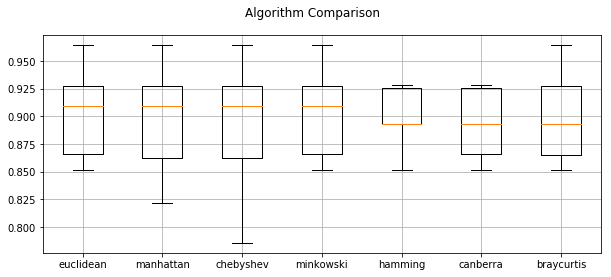

In [42]:
# Compare Algorithms
fig = plt.figure( figsize=(10,4) )
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.grid()
plt.show()

1 1.0 0.8151260504201681
2 0.9094202898550725 0.7394957983193278
3 0.9202898550724637 0.8991596638655462
4 0.927536231884058 0.8739495798319328
5 0.9094202898550725 0.8907563025210085
6 0.9130434782608695 0.8907563025210085
7 0.9021739130434783 0.8991596638655462
8 0.9021739130434783 0.8991596638655462
9 0.9057971014492754 0.8991596638655462
10 0.9094202898550725 0.8991596638655462
11 0.9057971014492754 0.8991596638655462
12 0.9057971014492754 0.8991596638655462
13 0.9057971014492754 0.8991596638655462
14 0.9057971014492754 0.8991596638655462
15 0.9057971014492754 0.8991596638655462
16 0.9057971014492754 0.8991596638655462
17 0.9057971014492754 0.8991596638655462
18 0.9057971014492754 0.8991596638655462
19 0.9057971014492754 0.8991596638655462


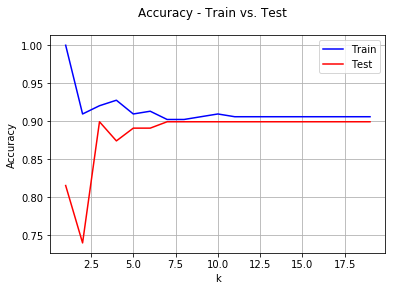

In [43]:
xx = range(1, 20)
yy1 = []
yy2 = []

for d in xx:
    model = KNeighborsClassifier(n_neighbors=d)
    model.fit(X_train, y_train)
    
    s1 = model.score(X_train, y_train)
    
    y_pred = model.predict(X_test)
    s2 = accuracy_score(y_pred, y_test)
    
    print(d, s1, s2)
    yy1.append(s1)
    yy2.append(s2)

    
fig = plt.figure( figsize=(6,4) )
fig.suptitle('Accuracy - Train vs. Test')

plt.plot(xx, yy1, c='blue', label='Train')
plt.plot(xx, yy2, c='red', label='Test')

plt.xlabel('k')
plt.ylabel('Accuracy')

plt.grid()
plt.legend(loc='upper right')
plt.show()

In [44]:
def param_selection(X, y, nfolds):
    
    Ks = range(1, 20)
    metrics = ['euclidean', 'manhattan', 'minkowski']
    param_grid = {'n_neighbors': Ks, 'metric' : metrics}
    grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_

    print(grid_search.score(X, y))
    
    y_pred = grid_search.predict(X_test)
    print(accuracy_score(y_pred, y_test))
    
    return grid_search.best_params_

param_selection(X_train, y_train, 10)

0.9057971014492754
0.8991596638655462


{'metric': 'euclidean', 'n_neighbors': 9}

[[  0  12]
 [  0 107]]


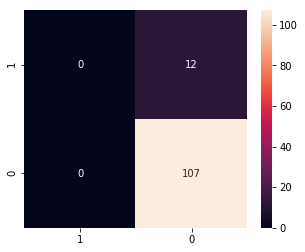

In [45]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

model = KNeighborsClassifier(n_neighbors=12, metric='euclidean')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cm=confusion_matrix(y_test,y_pred)

print(cm)

df_cm = pd.DataFrame(cm, index = [i for i in "10"],
                  columns = [i for i in "10"])
plt.figure(figsize = (5,4))
sn.heatmap(df_cm, annot=True, fmt='d')
plt.show()

In [46]:
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

             precision    recall  f1-score   support

    class 0       0.00      0.00      0.00        12
    class 1       0.90      1.00      0.95       107

avg / total       0.81      0.90      0.85       119



C:\Users\sxf161730\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [47]:
### Neural Network Section

In [48]:
# Spot Check Algorithms
models = []
models.append(('relu', MLPClassifier(activation='relu',max_iter=1000)))
models.append(('logistic', MLPClassifier(activation='logistic',max_iter=1000)))
models.append(('tanh', MLPClassifier(activation='tanh',max_iter=1000)))
models.append(('identity', MLPClassifier(activation='identity',max_iter=1000)))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10)
	cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

relu: 0.880291 (0.051415)
logistic: 0.840212 (0.061364)
tanh: 0.847619 (0.050876)
identity: 0.847222 (0.065399)


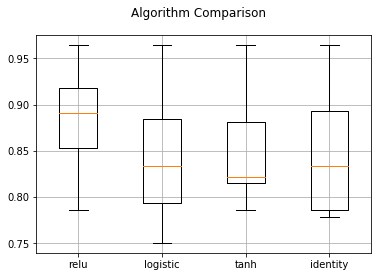

In [49]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.grid()
plt.show()

In [71]:
import time

# Spot Check Algorithms
models = []

xx = range(1,21)

for i in xx:
    models.append((str(i), MLPClassifier(activation='tanh',max_iter=10000,hidden_layer_sizes=(i,) )))

acc1 = []
acc2 = []
tim = []

# evaluate each model in turn
results = []
names = []
for name, model in models:
	start_time = time.time()
    
	kfold = model_selection.KFold(n_splits=10)
	cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    
	elapsed_time = time.time() - start_time
	tim.append(elapsed_time)
    
	results.append(cv_results)
    
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
    
	model.fit(X_train, y_train)
	s1 = model.score(X_train, y_train)
	acc1.append(s1)
	s2 = model.score(X_test, y_test)
	print(s2)
    
	acc2.append(s2)

1: 0.833201 (0.058732)
0.907563025210084
2: 0.880688 (0.064223)
0.907563025210084
3: 0.873016 (0.063825)
0.8739495798319328
4: 0.873016 (0.047020)
0.8907563025210085
5: 0.854894 (0.065649)
0.8151260504201681
6: 0.851587 (0.071134)
0.8823529411764706
7: 0.858598 (0.056889)
0.865546218487395
8: 0.855026 (0.045462)
0.8907563025210085
9: 0.876984 (0.060639)
0.8823529411764706
10: 0.844444 (0.062677)
0.8823529411764706
11: 0.837037 (0.048909)
0.8907563025210085
12: 0.858730 (0.052110)
0.8487394957983193
13: 0.847751 (0.042606)
0.8403361344537815
14: 0.858598 (0.064015)
0.8823529411764706
15: 0.851720 (0.064875)
0.8571428571428571
16: 0.855423 (0.070146)
0.8823529411764706
17: 0.829762 (0.045565)
0.8739495798319328
18: 0.866138 (0.064695)
0.865546218487395
19: 0.847884 (0.073994)
0.865546218487395
20: 0.840741 (0.058394)
0.8571428571428571


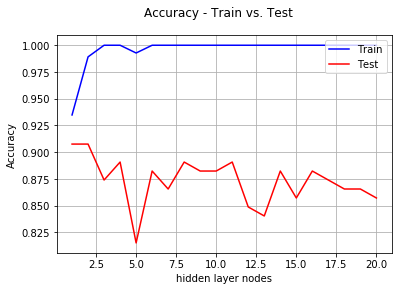

In [72]:
fig = plt.figure( figsize=(6,4) )
fig.suptitle('Accuracy - Train vs. Test')

plt.plot(xx, acc1, c='blue', label='Train')
plt.plot(xx, acc2, c='red', label='Test')

plt.xlabel('hidden layer nodes')
plt.ylabel('Accuracy')

plt.grid()
plt.legend(loc='upper right')
plt.show()

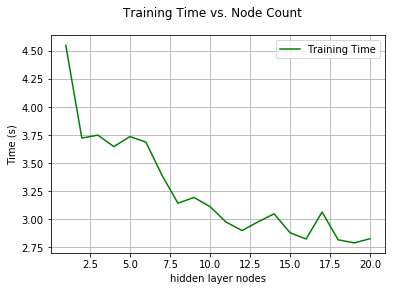

In [73]:
fig = plt.figure( figsize=(6,4) )
fig.suptitle('Training Time vs. Node Count')

plt.plot(xx, tim, c='green', label='Training Time')

plt.xlabel('hidden layer nodes')
plt.ylabel('Time (s)')

plt.grid()
plt.legend(loc='upper right')
plt.show()

In [54]:
import time

# Spot Check Algorithms
models = []

xx = range(1,21)

for i in xx:
    models.append((str(i), MLPClassifier(activation='tanh',max_iter=10000,hidden_layer_sizes=(i,i,) )))

acc1 = []
acc2 = []
tim = []

# evaluate each model in turn
results = []
names = []
for name, model in models:
	start_time = time.time()
    
	kfold = model_selection.KFold(n_splits=10)
	cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    
	elapsed_time = time.time() - start_time
	tim.append(elapsed_time)
    
	results.append(cv_results)
    
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
    
	model.fit(X_train, y_train)
	s1 = model.score(X_train, y_train)
	acc1.append(s1)
	s2 = model.score(X_test, y_test)
	print(s1, s2)
    
	acc2.append(s2)

1: 0.826058 (0.097004)
0.9927536231884058 0.8991596638655462
2: 0.876587 (0.070261)
1.0 0.8823529411764706
3: 0.865873 (0.063200)
0.9963768115942029 0.8571428571428571
4: 0.858730 (0.059161)
0.9963768115942029 0.8571428571428571
5: 0.851455 (0.061746)
0.9963768115942029 0.8823529411764706
6: 0.866138 (0.053226)
1.0 0.8739495798319328
7: 0.844709 (0.081153)
1.0 0.8487394957983193
8: 0.866138 (0.067819)
1.0 0.8823529411764706
9: 0.869444 (0.046938)
1.0 0.8823529411764706
10: 0.862566 (0.075100)
1.0 0.865546218487395
11: 0.862566 (0.049826)
1.0 0.8403361344537815
12: 0.851455 (0.057466)
1.0 0.8907563025210085
13: 0.866005 (0.068054)
1.0 0.9159663865546218
14: 0.862302 (0.067715)
1.0 0.8907563025210085
15: 0.847487 (0.054644)
1.0 0.8571428571428571
16: 0.858995 (0.062543)
1.0 0.8991596638655462
17: 0.837302 (0.063959)
1.0 0.8739495798319328
18: 0.837169 (0.051214)
1.0 0.8739495798319328
19: 0.880423 (0.077715)
1.0 0.8823529411764706
20: 0.862434 (0.055338)
1.0 0.8991596638655462


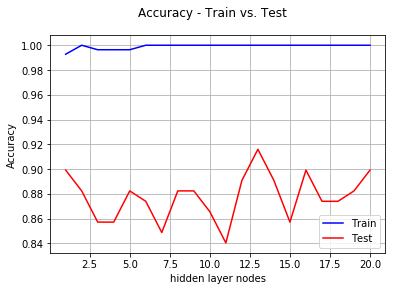

In [55]:
fig = plt.figure( figsize=(6,4) )
fig.suptitle('Accuracy - Train vs. Test')

plt.plot(xx, acc1, c='blue', label='Train')
plt.plot(xx, acc2, c='red', label='Test')

plt.xlabel('hidden layer nodes')
plt.ylabel('Accuracy')

plt.grid()
plt.legend(loc='best')
plt.show()

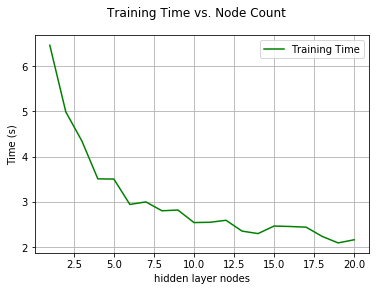

In [56]:
fig = plt.figure( figsize=(6,4) )
fig.suptitle('Training Time vs. Node Count')

plt.plot(xx, tim, c='green', label='Training Time')

plt.xlabel('hidden layer nodes')
plt.ylabel('Time (s)')

plt.grid()
plt.legend(loc='upper right')
plt.show()

In [70]:
model = MLPClassifier(activation='relu',max_iter=10000,hidden_layer_sizes=(100,) )

model.fit(X_train, y_train)

print ( 'Test: {0} , Train: {1}'.format(model.score(X_train, y_train), model.score(X_test, y_test)) )

Test: 1.0 , Train: 0.907563025210084
